In [211]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D,Flatten,Dense,BatchNormalization,Dropout

### Generators

In [212]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [213]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = 'Leo-v-Ali/train',
    labels='inferred',
    label_mode='int',
    batch_size=20,
    image_size=(256,256)
)

Found 151 files belonging to 2 classes.


In [214]:
test_ds = keras.utils.image_dataset_from_directory(
    directory = 'Leo-v-Ali/test',
    labels='inferred',
    label_mode='int',# we want it in int format so ali-0 and leo-1
    batch_size=20, # diveide into 32 batches
    image_size=(256,256)
)

Found 40 files belonging to 2 classes.


### Normilize

In [215]:
def process(image,label):
    image = tf.cast(image/255.0,tf.float32)
    return image,label

train_ds = train_ds.map(process)
test_ds = test_ds.map(process)

### CNN

In [216]:
# 3 convolutional layres
# 32-64-128 filters

In [217]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))

model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())
model.add(Dense(128,activation='relu'))  #128 nuerons
model.add(Dense(64,activation='relu'))  #128 nuerons
model.add(Dense(1,activation='sigmoid'))  #128 nuerons

### Compile

In [218]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [219]:
res = model.fit(train_ds,epochs=10,validation_data = test_ds)

Epoch 1/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 9s 632ms/step - accuracy: 0.4273 - loss: 0.9452 - val_accuracy: 0.5000 - val_loss: 0.6896
Epoch 2/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 551ms/step - accuracy: 0.5194 - loss: 0.6772 - val_accuracy: 0.6250 - val_loss: 0.6718
Epoch 3/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 559ms/step - accuracy: 0.7235 - loss: 0.5983 - val_accuracy: 0.7750 - val_loss: 0.5704
Epoch 4/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 568ms/step - accuracy: 0.8409 - loss: 0.3790 - val_accuracy: 0.6750 - val_loss: 0.6506
Epoch 5/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 564ms/step - accuracy: 0.9323 - loss: 0.1926 - val_accuracy: 0.6750 - val_loss: 0.7244
Epoch 6/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 556ms/step - accuracy: 0.9703 - loss: 0.0859 - val_accuracy: 0.6500 - val_loss: 1.4466
Epoch 7/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 543ms/step - accuracy: 0.8870 - loss: 0.2570 - val_accuracy: 0.6250 - val_loss: 1.0187
Epoch 8/10
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 549ms/step - accuracy: 0.9682 - loss: 0.0896 - val_accuracy: 0.6250 - val_loss:

### Graph to check the accuracy vs loss

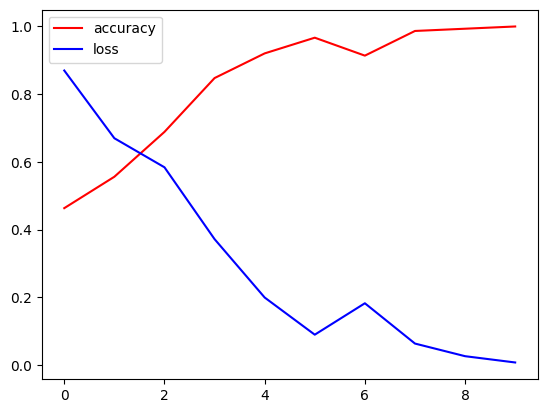

In [220]:
import matplotlib.pyplot as plt

plt.plot(res.history['accuracy'],color='red',label='accuracy')
plt.plot(res.history['loss'],color='blue',label='loss')
plt.legend()
plt.show()

### Graph to check the accuracy and loss of traninga and testing datasets

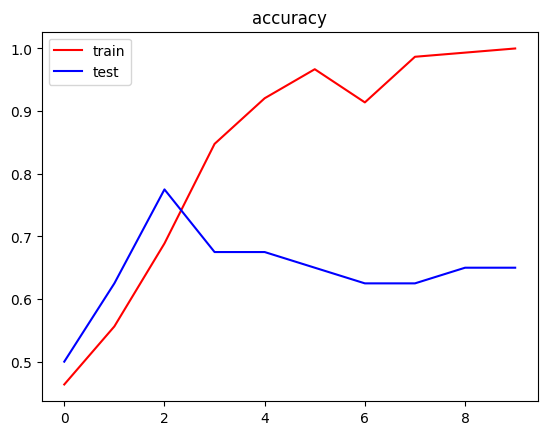

In [221]:
# Training
plt.plot(res.history['accuracy'],color='red',label='train')
plt.plot(res.history['val_accuracy'],color='blue',label='test')
plt.title('accuracy')
plt.legend()
plt.show()

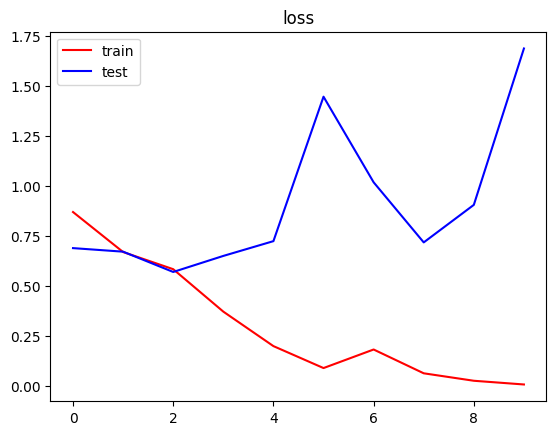

In [222]:
# Testing
plt.plot(res.history['loss'],color='red',label='train')
plt.plot(res.history['val_loss'],color='blue',label='test')
plt.title('loss')
plt.legend()
plt.show()

### Predections

In [223]:
import cv2

In [228]:
img = cv2.imread("Leo-v-Ali/new.jpg")

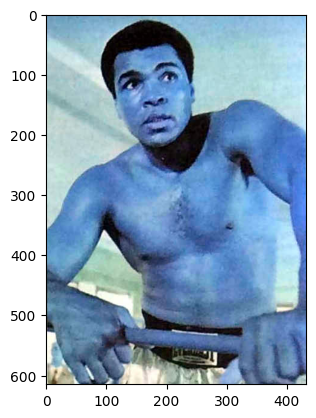

In [229]:
plt.imshow(img)

In [230]:
img.shape

(615, 433, 3)

In [231]:
img = cv2.resize(img,(256,256))

In [232]:
ans = img.reshape((1,256,256,3))

In [233]:
pred = model.predict(ans)
print(float(pred))
if pred > 0.5:
        print("Prediction: Leo Messi")
else:
        print("Prediction: Mohammed Ali")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 171ms/step
0.0
Prediction: Mohammed Ali


C:\Users\ibrah\AppData\Local\Temp\ipykernel_31960\2128310264.py:2: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print(float(pred))
